In [373]:
import torch
import torchvision
from scipy.io import loadmat
import numpy as np
from PIL import Image
import json

In [2]:
image_path = '/media/ubombar/Backup/datasets/original/mpii_human_pose_v1_u12_2/images'
matlab_path = '/media/ubombar/Backup/datasets/original/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat'

In [3]:
matfile = loadmat(matlab_path)['RELEASE']

In [ ]:
t1, t2, t3, t4, t5, t6 = matfile.item()

In [376]:
def iterate_tuple_12(t1, t2):
    image_array = []
    skipped_images = set()
    appened_images = set()
    
    for row_t1, row_t2 in zip(t1[0], t2[0]):
        row_t1 = row_t1.item()
        st1, st2, _, _ = row_t1
        
        image_name = st1.item()[0][0]
        is_train = bool(row_t2 == 1)
        
        # idk why but their annotations are empty so skip
        if st2.size == 0: 
            skipped_images.add(image_name)
            continue
            
        people_array = []
        
        # iterate over people
        for row_st1 in st2[0]:
            if row_st1 is None: continue
            row_st1_item = row_st1.item()
            
            if len(row_st1_item) == 2 and True: # TYPE 1 Annotation
                if row_st1_item[0].size == 0: continue
                
                scale = float(row_st1_item[0].item())
                objposx = int(row_st1_item[1].item()[0].item())
                objposy = int(row_st1_item[1].item()[1].item())
                
                people_array.append({
                    'type': 1,
                    'scale': scale,
                    'objposx': objposx,
                    'objposy': objposy
                })
                
            elif len(row_st1_item) == 4 and True: # TYPE 2 Annotation
                x1, y1, x2, y2 = row_st1_item
                x1, y1, x2, y2 = x1.item(), y1.item(), x2.item(), y2.item()
                people_array.append({
                    'type': 2,
                    'head_coordinates': {
                        'x1': x1,
                        'y1': y1,
                        'x2': x2,
                        'y2': y2
                    }
                })
        
            elif len(row_st1_item) == 7 and True: # TYPE 3 Annotation
                if row_st1_item[4].size == 0: continue
                
                x1, y1, x2, y2 = row_st1_item[:4]
                x1, y1, x2, y2 = x1.item(), y1.item(), x2.item(), y2.item()
                joint_object = {
                    'type': 3,
                    'head_coordinates': {
                        'x1': x1,
                        'y1': y1,
                        'x2': x2,
                        'y2': y2
                    },
                    'joints': []
                }
                
                for joint in row_st1_item[4].item()[0][0]:
                    if len(joint) == 3:
                        x, y, jid = joint
                        x, y, jid = int(x), int(y), int(jid)
                        visible = False
                        joint_object['joints'].append({
                            'x': x,
                            'y': y,
                            'id': jid,
                            'is_visible': visible
                        })
                    else:
                        x, y, jid, visible = joint
                        x, y, jid = int(x), int(y), int(jid)

                        if joint[3].size == 0:
                            visible = False
                        else:
                            visible = bool(visible == 1)
                        joint_object['joints'].append({
                            'x': x,
                            'y': y,
                            'id': jid,
                            'is_visible': visible
                        })
                people_array.append(joint_object)
        
            elif len(row_st1_item) == 17 and True: # TYPE 3 Annotation
                if row_st1_item[4].size == 0: continue
                
                x1, y1, x2, y2 = row_st1_item[:4]
                x1, y1, x2, y2 = x1.item(), y1.item(), x2.item(), y2.item()
                joint_object = {
                    'type': 3,
                    'head_coordinates': {
                        'x1': x1,
                        'y1': y1,
                        'x2': x2,
                        'y2': y2
                    },
                    'joints': []
                }
                
                for joint in row_st1_item[4].item()[0][0]:
                    if len(joint) == 3:
                        x, y, jid = joint
                        x, y, jid = int(x), int(y), int(jid)
                        visible = False
                        
                        joint_object['joints'].append({
                            'x': x,
                            'y': y,
                            'id': jid,
                            'is_visible': visible
                        })
                    else:
                        x, y, jid, visible = joint
                        x, y, jid = int(x), int(y), int(jid)

                        if joint[3].size == 0:
                            visible = False
                        else:
                            visible = bool(visible == 1)
                            
                        joint_object['joints'].append({
                            'x': x,
                            'y': y,
                            'id': jid,
                            'is_visible': visible
                        })
                people_array.append(joint_object)
                
            elif len(row_st1_item) == 35 and True: # TYPE 3 Annotation
                if row_st1_item[4].size == 0: continue
                
                x1, y1, x2, y2 = row_st1_item[:4]
                x1, y1, x2, y2 = x1.item(), y1.item(), x2.item(), y2.item()
                joint_object = {
                    'type': 3,
                    'head_coordinates': {
                        'x1': x1,
                        'y1': y1,
                        'x2': x2,
                        'y2': y2
                    },
                    'joints': []
                }
                
                for joint in row_st1_item[4].item()[0][0]:
                    x, y, jid, visible = joint
                    x, y, jid = int(x), int(y), int(jid)
                    
                    if joint[3].size == 0:
                        visible = False
                    else:
                        visible = bool(visible == 1)
                        
                    joint_object['joints'].append({
                        'x': x,
                        'y': y,
                        'id': jid,
                        'is_visible': visible
                    })
                people_array.append(joint_object)

            image_object = {
                'image_name': image_name,
                'people': people_array
            }
            image_array.append(image_object)
            appened_images.add(image_name)
        
    return image_array, (skipped_images, appened_images)
        
image_array, (skipped_images, appened_images) = iterate_tuple_12(t1, t2)


recovered = (len(appened_images)) / (len(skipped_images) + len(appened_images)) * 100
print(f'JSON process finished, {int(recovered)}% of the images are translated ({len(skipped_images)} skipped, {len(appened_images)} recovered, {len(skipped_images) + len(appened_images)} total).')
print('Saving JSON file ...')

with open('./resulting.json', 'w+') as fp:
    json.dump(image_array, fp, indent=4)

print('JSON file saved to the disk!')

<ipython-input-376-4f7d52dc373c>:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  visible = bool(visible == 1)


JSON process finished, 96% of the images are translated (820 skipped, 24122 recovered, 24942 total).
Saving JSON file ...
JSON file saved to the disk!


In [59]:
import torch
import torchvision
import numpy as np
from PIL import Image
import json
import numpy as np 
import matplotlib.pyplot as plt 
import os 


json_path = './annotations/mpii/fullannotations.json'
joint_path = './annotations/mpii/jointdict.json'
images_path = './images/mpii_resized'
mapp_path = './images/mpii_map'

with open(json_path, 'r') as fp:
    json_list = json.load(fp)

with open(joint_path, 'r') as fp:
    joint_dict = json.load(fp)

image_object = json_list[5]
image_file = os.path.join(images_path, image_object['image_name'])
image_array = np.array(Image.open(image_file))
# present_pose(image_array, image_object['people'], joint_dict)

    

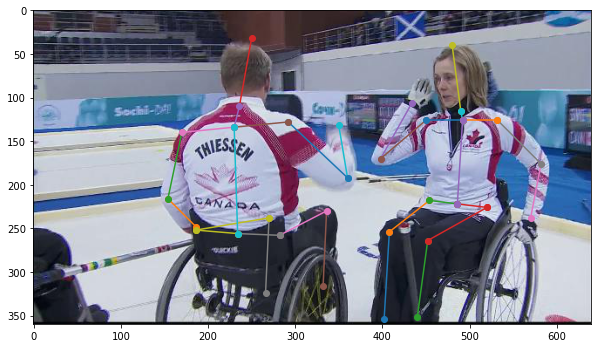

In [66]:
def get_joint(joint_id, joint_list):
    for joint in joint_list:
        if joint['id'] == joint_id: return joint
    return None

def plot_line(coor1, coor2):
    if coor1 and coor2: 
        x1, y1 = coor1
        x2, y2 = coor2
        plt.plot([2*x1, 2*x2], [2*y1, 2*y2], marker = 'o')
        # plt.scatter(*coor1)
        # plt.scatter(*coor2)

        # x1, y1 = [-1, 12], [1, 4]
        # x2, y2 = [1, 10], [3, 2]
        # plt.plot(x1, y1, x2, y2, marker = 'o')

def present_pose(image_array, people_list, joint_dict):
    plt.figure(figsize=(10, 20))
    plt.imshow(image_array)

    for person in people_list:
        joint_list = person['joints']
        joint_map = {}
        for k in joint_dict:
            joint_temp = get_joint(joint_dict[k], joint_list)
            if not joint_temp: 
                joint_map[k] = None
            else:
                joint_map[k] = (joint_temp['x'], joint_temp['y'])

        # print(joint_map.keys())

        # legs
        plot_line(joint_map['r_ankle'], joint_map['r_knee'])
        plot_line(joint_map['r_knee'], joint_map['r_hip'])
        plot_line(joint_map['l_ankle'], joint_map['l_knee'])
        plot_line(joint_map['l_knee'], joint_map['l_hip'])

        # arms
        plot_line(joint_map['r_wrist'], joint_map['r_elbow'])
        plot_line(joint_map['r_elbow'], joint_map['r_shoulder'])
        plot_line(joint_map['l_wrist'], joint_map['l_elbow'])
        plot_line(joint_map['l_elbow'], joint_map['l_shoulder'])

        # head
        plot_line(joint_map['upper_neck'], joint_map['head_top'])
        plot_line(joint_map['upper_neck'], joint_map['thorax'])

        # body
        plot_line(joint_map['r_shoulder'], joint_map['thorax'])
        plot_line(joint_map['l_shoulder'], joint_map['thorax'])

        plot_line(joint_map['r_hip'], joint_map['pelvis'])
        plot_line(joint_map['l_hip'], joint_map['pelvis'])

        plot_line(joint_map['thorax'], joint_map['pelvis'])
    
    plt.show()

present_pose(image_array, image_object['people'], joint_dict)